# 9-1 : linear regression of insurance.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_insurance = pd.read_csv("./insurance.csv", header = 0)
data = data_insurance.copy()

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


0. age : 나이, 정수형  
1. sex : 성별, 문자형  
2. bmi : bmi 지수, 실수형  
3. children : 자녀 수, 정수형  
4. smoker : 흡연 여부, 문자형  
5. region : 거주 지역, 문자형  
6. expenses : 비용, 종속변수, 실수형

### 학습에 사용할 수 있도록 매트릭스 형태로 변환

숫자형 변수 : 그대로 사용

문자형 변수 (카테고리 변수) : onehot encoding

In [5]:
import patsy

formula = "expenses ~ age + sex + bmi + children + smoker + region"
data_matrix = patsy.dmatrices(formula_like = formula,
                              data = data,
                              return_type = 'dataframe')
y_train, X_train = data_matrix

In [6]:
y_train.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [7]:
X_train.head()

,Intercept,sex[T.male],smoker[T.yes],region[T.northwest],region[T.southeast],region[T.southwest],age,bmi,children
0,1.0,0.0,1.0,0.0,0.0,1.0,19.0,27.9,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,18.0,33.8,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,28.0,33.0,3.0
3,1.0,1.0,0.0,1.0,0.0,0.0,33.0,22.7,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,32.0,28.9,0.0


### 선형회귀

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)
pred = model.predict(X_train)
mse = mean_squared_error(y_train, pred)
mae = mean_absolute_error(y_train, pred)

In [9]:
print("선형회귀모델의 계수\n")
for iter, column in enumerate(X_train.columns):
    print("{} 변수의 계수".format(column).ljust(30, ' '), ": {}".format(model.coef_[0, iter-1]))

선형회귀모델의 계수

Intercept 변수의 계수               : 475.68891551264454
sex[T.male] 변수의 계수             : -11941.562460855705
smoker[T.yes] 변수의 계수           : -131.352014107324
region[T.northwest] 변수의 계수     : 23847.476695040208
region[T.southeast] 변수의 계수     : -352.79009551848645
region[T.southwest] 변수의 계수     : -1035.5957010023126
age 변수의 계수                     : -959.3058293994179
bmi 변수의 계수                     : 256.839170623225
children 변수의 계수                : 339.28986330949357


In [10]:
print("선형회귀모델의 MSE : {}".format(mse))
print("선형회귀모델의 MAE : {}".format(mae))

선형회귀모델의 MSE : 36499631.63514606
선형회귀모델의 MAE : 4170.7309867908


# 9-2, 9-3 : diabetes 데이터 선형회귀, 릿지회귀, 라쏘회귀

In [11]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [12]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [13]:
X.shape, y.shape

((442, 10), (442,))

In [14]:
X[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [15]:
y[0:5]

array([151.,  75., 141., 206., 135.])

### 선형회귀

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
def linear_regression_cv(X, y, cv, random_state = 20152410):
    """선형회귀모델의 cv score 반환"""
    n = X.shape[0]
    np.random.seed(random_state)
    permutation = np.random.permutation(np.arange(0, n))
    cv_score_mse = []
    cv_score_mae = []

    # cv score 계산
    for iter in range(cv):
        # train, validation 분할
        train_index = np.concatenate([permutation[:int(iter*n/cv)], permutation[int((iter + 1)*n/cv):]])
        X_train = X[train_index]
        y_train = y[train_index]

        val_index = permutation[int(iter*n/cv):int((iter + 1)*n/cv)]
        X_val = X[val_index]
        y_val = y[val_index]
        
        # 선형회귀모델 학습 및 성능 평가
        linear_model = LinearRegression()
        linear_model.fit(X_train, y_train)
        val_pred = linear_model.predict(X_val)
        val_mse = mean_squared_error(y_val, val_pred)
        val_mae = mean_absolute_error(y_val, val_pred)

        cv_score_mse.append(val_mse)
        cv_score_mae.append(val_mae)

    return {'cv_score_mse' : cv_score_mse, 'cv_score_mae' : cv_score_mae}

In [18]:
linear_regression_cv_score = linear_regression_cv(X = X,
                                                  y = y,
                                                  cv = 5,
                                                  random_state = 20152410)

In [19]:
print("선형회귀모델의 cv_score_mse : {},\n평균 mse : {}".format(linear_regression_cv_score['cv_score_mse'],
                                                      np.mean(linear_regression_cv_score['cv_score_mse'])))
print("선형회귀모델의 cv_score_mae : {},\n평균 mae : {}".format(linear_regression_cv_score['cv_score_mae'],
                                                      np.mean(linear_regression_cv_score['cv_score_mae'])))

선형회귀모델의 cv_score_mse : [3109.794243978987, 2727.4424372165754, 3079.819414753706, 2966.795009929121, 3121.6123833069432],
평균 mse : 3001.0926978370667
선형회귀모델의 cv_score_mae : [44.01366297479206, 42.180871902652136, 46.245853792061006, 44.5633460947356, 45.282200695064724],
평균 mae : 44.45718709186111


In [20]:
linear_model = LinearRegression()
linear_model.fit(X, y)

print("선형회귀모델의 계수\n")
print("상수항".ljust(12, ' '), ': {}'.format(linear_model.intercept_))
for iter in range(linear_model.coef_.shape[0]):
    print("{} 변수의 계수".format(diabetes.feature_names[iter]).ljust(10, ' '), ": {}".format(linear_model.coef_[iter]))

선형회귀모델의 계수

상수항          : 152.1334841628965
age 변수의 계수 : -10.012197817470847
sex 변수의 계수 : -239.81908936565472
bmi 변수의 계수 : 519.8397867901343
bp 변수의 계수  : 324.3904276893763
s1 변수의 계수  : -792.1841616283061
s2 변수의 계수  : 476.74583782366255
s3 변수의 계수  : 101.04457032134488
s4 변수의 계수  : 177.0641762322512
s5 변수의 계수  : 751.2793210873945
s6 변수의 계수  : 67.62538639104386


### 릿지회귀

In [21]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [22]:
alphas = np.logspace(-4, 1, 400)

cv_score_ridge = [ cross_val_score(Ridge(alpha = alpha, normalize = True),
                                   X,
                                   y,
                                   cv = 5,
                                   scoring = make_scorer(mean_squared_error)).mean() for alpha in alphas]

cv_score_lasso = [ cross_val_score(Lasso(alpha = alpha, normalize = True),
                                   X,
                                   y,
                                   cv = 5,
                                   scoring = make_scorer(mean_squared_error)).mean() for alpha in alphas]

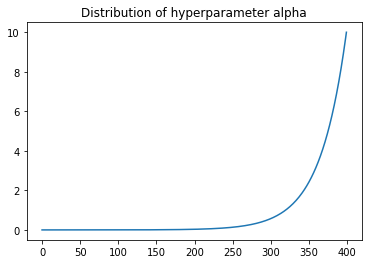

In [23]:
plt.plot(np.arange(0, 400), alphas)
plt.title("Distribution of hyperparameter alpha")
plt.show()

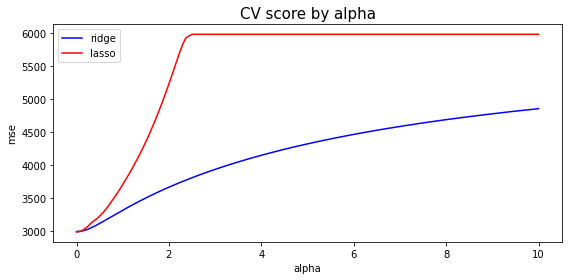

In [24]:
plt.figure(figsize = (8, 4))
plt.plot(alphas, cv_score_ridge, 'b-', label = 'ridge')
plt.plot(alphas, cv_score_lasso, 'r-', label = 'lasso')

plt.title("CV score by alpha", fontsize = 15)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
best_ridge_alpha = alphas[np.argmin(cv_score_ridge)]
best_lasso_alpha = alphas[np.argmin(cv_score_lasso)]

In [26]:
print("릿지 회귀모델의 CV mse 최솟값 : {},\n릿지 최적 파라미터 alpha : {}".format(cv_score_ridge[np.argmin(cv_score_ridge)],
                                                                best_ridge_alpha))
print("라쏘 회귀모델의 CV mse 최솟값 : {},\n라쏘 최적 파라미터 alpha : {}".format(cv_score_lasso[np.argmin(cv_score_lasso)],
                                                                best_lasso_alpha))

릿지 회귀모델의 CV mse 최솟값 : 2992.984660810382,
릿지 최적 파라미터 alpha : 0.0005983321728796288
라쏘 회귀모델의 CV mse 최솟값 : 2991.8491922626336,
라쏘 최적 파라미터 alpha : 0.004256696454607871


In [27]:
ridge_model = Ridge(alpha = best_ridge_alpha, normalize = True)
ridge_model.fit(X, y)

lasso_model = Lasso(alpha = best_lasso_alpha, normalize = True)
lasso_model.fit(X, y)

Lasso(alpha=0.004256696454607871, normalize=True)

In [28]:
print("릿지회귀모델의 계수")
print("라쏘회귀모델의 규제 파라미터 : {}\n".format(ridge_model.alpha))
print("상수항".ljust(12, ' '), ': {}'.format(ridge_model.intercept_))
for iter in range(ridge_model.coef_.shape[0]):
    print("{} 변수의 계수".format(diabetes.feature_names[iter]).ljust(10, ' '), ": {}".format(ridge_model.coef_[iter]))

릿지회귀모델의 계수
라쏘회귀모델의 규제 파라미터 : 0.0005983321728796288

상수항          : 152.1334841628965
age 변수의 계수 : -9.726823338052709
sex 변수의 계수 : -239.37219485128085
bmi 변수의 계수 : 520.1773958241004
bp 변수의 계수  : 324.04480081387334
s1 변수의 계수  : -742.3095500992263
s2 변수의 계수  : 437.17166619107496
s3 변수의 계수  : 79.02807769856464
s4 변수의 계수  : 171.08447381093112
s5 변수의 계수  : 732.3480180002167
s6 변수의 계수  : 67.93038206329116


In [29]:
print("라쏘회귀모델의 계수")
print("라쏘회귀모델의 규제 파라미터 : {}\n".format(lasso_model.alpha))
print("상수항".ljust(12, ' '), ': {}'.format(lasso_model.intercept_))
for iter in range(lasso_model.coef_.shape[0]):
    print("{} 변수의 계수".format(diabetes.feature_names[iter]).ljust(10, ' '), ": {}".format(lasso_model.coef_[iter]))

라쏘회귀모델의 계수
라쏘회귀모델의 규제 파라미터 : 0.004256696454607871

상수항          : 152.13348416289648
age 변수의 계수 : -6.167627403751548
sex 변수의 계수 : -235.3044813085324
bmi 변수의 계수 : 522.1437192874059
bp 변수의 계수  : 320.759320053947
s1 변수의 계수  : -562.7083367780614
s2 변수의 계수  : 295.4754685532383
s3 변수의 계수  : -0.0
s4 변수의 계수  : 146.0312248392512
s5 변수의 계수  : 666.8624316332792
s6 변수의 계수  : 66.61730754216445
